#### HABUMUGISHA Emmanuel
#### 225229109

### Lab-14: Classification of CIFAR-10 data with Data Augmentation

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical  # Updated import
from tensorflow.keras.optimizers import RMSprop
from keras.backend import categorical_crossentropy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


In [3]:
#1.Import CIFAR-19 dataset from keras

In [4]:
from keras.datasets import cifar10

In [5]:
#2.Split train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2632s 15us/step


In [7]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [8]:
X_train[20]

array([[[153, 157, 155],
        [174, 180, 188],
        [155, 165, 172],
        ...,
        [122, 125, 123],
        [138, 143, 141],
        [ 97, 101,  97]],

       [[160, 163, 165],
        [164, 170, 180],
        [150, 159, 169],
        ...,
        [137, 135, 129],
        [160, 161, 157],
        [103, 109, 107]],

       [[140, 143, 147],
        [147, 152, 166],
        [136, 145, 158],
        ...,
        [104, 103,  99],
        [125, 128, 125],
        [ 93, 102, 101]],

       ...,

       [[175, 177, 179],
        [170, 172, 174],
        [170, 172, 174],
        ...,
        [193, 203, 212],
        [197, 206, 214],
        [199, 204, 213]],

       [[174, 177, 181],
        [173, 176, 180],
        [171, 174, 178],
        ...,
        [200, 208, 216],
        [202, 209, 218],
        [208, 212, 221]],

       [[168, 173, 180],
        [164, 169, 175],
        [166, 171, 177],
        ...,
        [204, 209, 217],
        [204, 208, 217],
        [206, 210, 219]]

In [9]:
#3.Convert ytrain and ytest to categorical values

In [10]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
#4.Normalize X values by dividing it by 255

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
#5.Create the baseline model as below

In [14]:
model = Sequential()
##5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32,(5,5), strides = (2,2), padding = 'same' , input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

##Another 5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32, (5,5), strides = (2,2)))
model.add(Activation('relu'))

##2x2 max pooling reduces to 3x3x32
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

##Flatten turns 3x3x32 into 288x1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

In [16]:
#6.Train the baseline model

In [24]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop  # Use the TensorFlow version of RMSprop
from tensorflow.keras.optimizers import legacy  # Import the legacy optimizer


In [25]:
batch_size = 32

# Initialize RMSprop optimizer with legacy optimizer
opt = legacy.RMSprop(lr=0.0005, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\optimizers\legacy\rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_data= (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 69s 27ms/step - loss: 1.7280 - accuracy: 0.3691 - val_loss: 1.4304 - val_accuracy: 0.4888
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4465 - accuracy: 0.4815 - val_loss: 1.3260 - val_accuracy: 0.5339
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3378 - accuracy: 0.5227 - val_loss: 1.4460 - val_accuracy: 0.4747
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2733 - accuracy: 0.5464 - val_loss: 1.2123 - val_accuracy: 0.5661
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2270 - accuracy: 0.5679 - val_loss: 1.1156 - val_accuracy: 0.6000
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1946 - accuracy: 0.5801 - val_loss: 1.2197 - val_accuracy: 0.5680
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1680 - accuracy: 0.5892 - val_loss: 1.0975 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


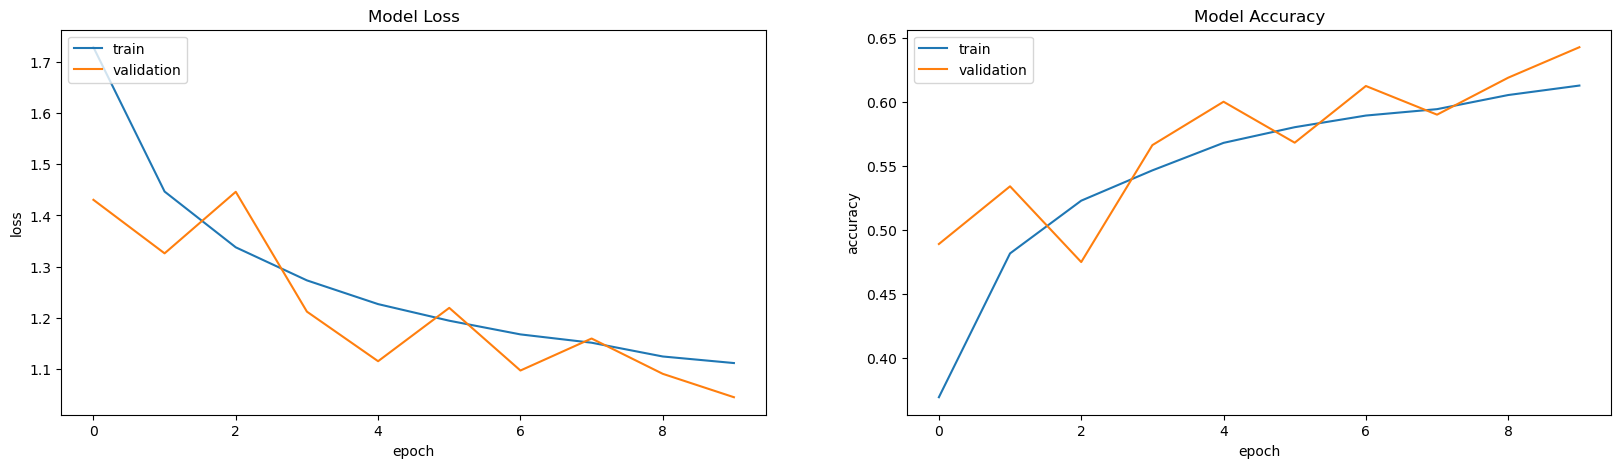

In [27]:
print(history.history.keys())

fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
#7.Define baseline Data Augmentation steps

In [29]:
model1=Sequential()
model1.add(Conv2D(32, (5,5), strides=(2,2),padding='same',input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(32,(5,5),strides=(2,2)))
model1.add(Activation('relu'))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_5 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 32)          0         
                                                      

In [31]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(X_train)

In [35]:
import keras
import tensorflow as tf
# Define the learning rate and weight decay as separate variables
learning_rate = 0.0005
weight_decay = 1e-6

# Initialize legacy RMSprop optimizer with decay
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate, decay=weight_decay)

# Compile the model using the legacy optimizer
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [36]:
#Fit the model on the batches generated by datagen.flow()

history1 = model1.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                   epochs=15,
                   validation_data = (X_test, y_test))

C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_5316\3185657148.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),


Epoch 1/15
1562/1562 [==============================] - 63s 39ms/step - loss: 1.7986 - accuracy: 0.3383 - val_loss: 1.4485 - val_accuracy: 0.4831
Epoch 2/15
1562/1562 [==============================] - 62s 39ms/step - loss: 1.5365 - accuracy: 0.4421 - val_loss: 1.3765 - val_accuracy: 0.5132
Epoch 3/15
1562/1562 [==============================] - 60s 39ms/step - loss: 1.4395 - accuracy: 0.4820 - val_loss: 1.2434 - val_accuracy: 0.5534
Epoch 4/15
1562/1562 [==============================] - 60s 38ms/step - loss: 1.3869 - accuracy: 0.5042 - val_loss: 1.2134 - val_accuracy: 0.5736
Epoch 5/15
1562/1562 [==============================] - 61s 39ms/step - loss: 1.3476 - accuracy: 0.5213 - val_loss: 1.1888 - val_accuracy: 0.5786
Epoch 6/15
1562/1562 [==============================] - 67s 43ms/step - loss: 1.3310 - accuracy: 0.5251 - val_loss: 1.1684 - val_accuracy: 0.5881
Epoch 7/15
1562/1562 [==============================] - 60s 39ms/step - loss: 1.3053 - accuracy: 0.5343 - val_loss: 1.1370 -

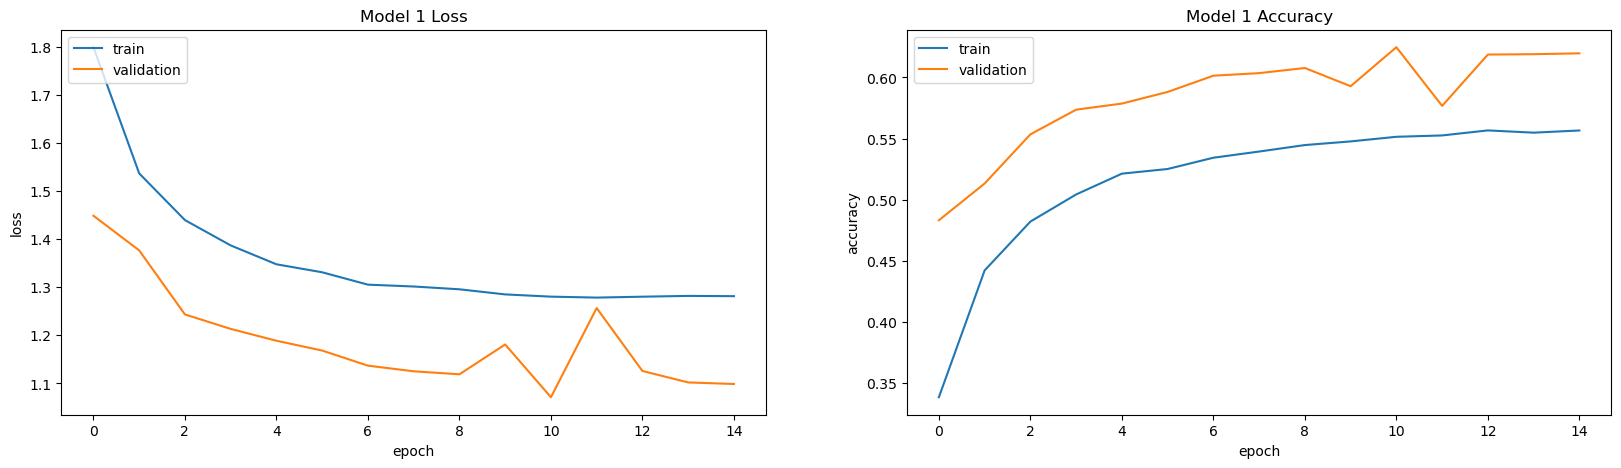

In [37]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
#8.Answer the Questions

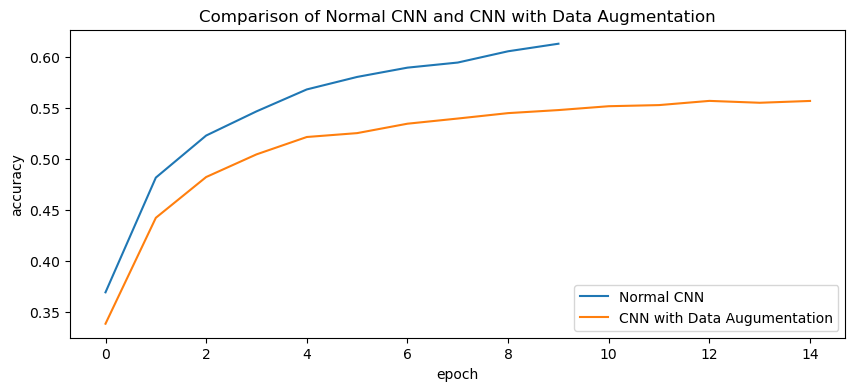

In [39]:
figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Comparison of Normal CNN and CNN with Data Augmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Normal CNN', 'CNN with Data Augumentation'], loc='lower right')
plt.show()

In [40]:
#9.Build a more complicated model with the following pattern:

In [41]:
model2=Sequential()
model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        25632     
                                                      

In [42]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False,)

datagen.fit(X_train)

In [46]:
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(learning_rate=0.0005)

model2.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])


In [ ]:
model2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                   steps_per_epoch=X_train.shape[0] // batch_size,
                   epochs=10,
                   validation_data=(X_test,y_test))

Epoch 1/10


C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_5316\661035635.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),


1562/1562 [==============================] - 234s 149ms/step - loss: 1.6645 - accuracy: 0.3940 - val_loss: 1.3334 - val_accuracy: 0.5209
Epoch 2/10
1562/1562 [==============================] - 264s 169ms/step - loss: 1.2736 - accuracy: 0.5454 - val_loss: 1.1654 - val_accuracy: 0.5906
Epoch 3/10
1562/1562 [==============================] - 231s 148ms/step - loss: 1.0929 - accuracy: 0.6140 - val_loss: 0.9412 - val_accuracy: 0.6677
Epoch 4/10
1562/1562 [==============================] - 224s 144ms/step - loss: 0.9768 - accuracy: 0.6583 - val_loss: 0.9102 - val_accuracy: 0.6946
Epoch 5/10
1562/1562 [==============================] - 218s 140ms/step - loss: 0.9076 - accuracy: 0.6808 - val_loss: 0.8370 - val_accuracy: 0.7116
Epoch 6/10
 700/1562 [============>.................] - ETA: 2:24 - loss: 0.8583 - accuracy: 0.6978